In [51]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [6]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 10

In [7]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [8]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [9]:
len(dataset)

68

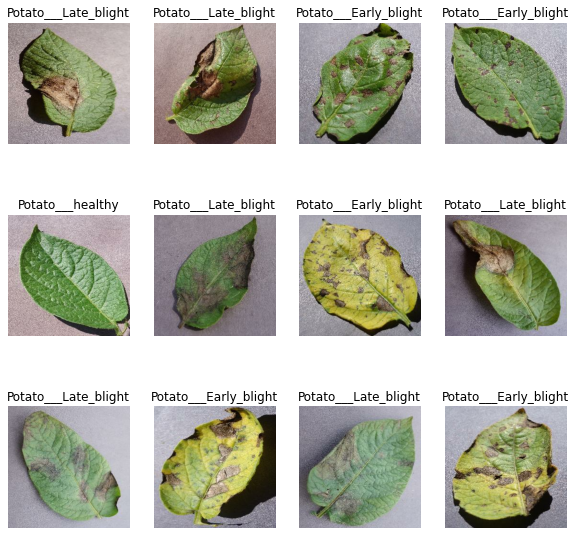

In [10]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    #print(image_batch.shape)
    #print(label_batch.numpy())
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
    

In [11]:
80% ==> training
20% ==> 10%validation, 10% ==>test

SyntaxError: invalid syntax (Temp/ipykernel_18192/4252668980.py, line 1)

In [12]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [13]:
train_ds = dataset.take(54)
len(train_ds)

54

In [14]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [15]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [16]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [17]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [18]:
def get_datset_partitions_tf(ds,train_split=0.8,val_split = 0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size,seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds,val_ds,test_ds

In [19]:

train_ds, val_ds, test_ds = get_datset_partitions_tf(dataset)

In [20]:
len(train_ds)

54

In [21]:
len(val_ds)

6

In [22]:


len(test_ds)

8

In [23]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)



In [24]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
    
])

In [25]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
    
])

In [26]:
BATCH_SIZE = 32
input_shape = (BATCH_SIZE , IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
    
    
])
model.build(input_shape=input_shape)

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                  

In [65]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
)

AttributeError: 'int' object has no attribute 'compile'

In [29]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/10
54/54 [==============================] - 223s 4s/step - loss: 0.9136 - accuracy: 0.4971 - val_loss: 0.9148 - val_accuracy: 0.4844
Epoch 2/10
54/54 [==============================] - 195s 4s/step - loss: 0.7802 - accuracy: 0.6140 - val_loss: 0.4720 - val_accuracy: 0.7969
Epoch 3/10
54/54 [==============================] - 168s 3s/step - loss: 0.4503 - accuracy: 0.8125 - val_loss: 0.3464 - val_accuracy: 0.8281
Epoch 4/10
54/54 [==============================] - 188s 3s/step - loss: 0.2878 - accuracy: 0.8785 - val_loss: 0.4841 - val_accuracy: 0.8281
Epoch 5/10
54/54 [==============================] - 214s 4s/step - loss: 0.3440 - accuracy: 0.8605 - val_loss: 0.2737 - val_accuracy: 0.8958
Epoch 6/10
54/54 [==============================] - 207s 4s/step - loss: 0.2559 - accuracy: 0.8981 - val_loss: 0.2088 - val_accuracy: 0.9115
Epoch 7/10
54/54 [==============================] - 202s 4s/step - loss: 0.2280 - accuracy: 0.9103 - val_loss: 0.2634 - val_accuracy: 0.9062
Epoch 8/10
54

In [30]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 31s 908ms/step - loss: 0.2918 - accuracy: 0.8828


In [31]:
scores

[0.29182755947113037, 0.8828125]

In [32]:
history

In [33]:
tf.keras.callbacks.History()

In [34]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 54}

In [35]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [36]:
len(history.history["accuracy"])

10

In [37]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

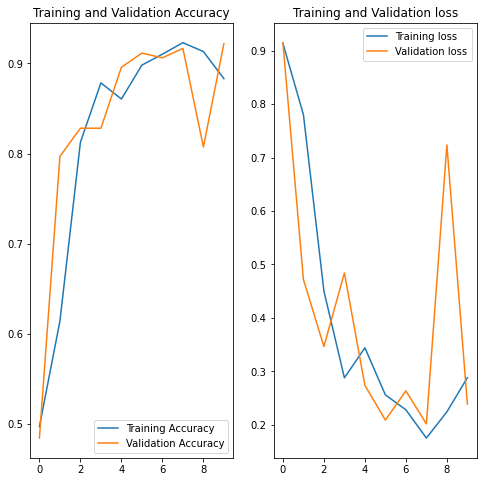

In [38]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc, label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc, label='Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')



plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss, label='Training loss')
plt.plot(range(EPOCHS),val_loss, label='Validation loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation loss')
plt.show()

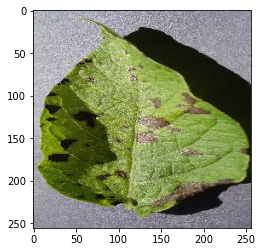

In [39]:
for images_batch, labels_batch in test_ds.take(1):
    
    plt.imshow(images_batch[0].numpy().astype('uint8'))

In [40]:
for images_batch, labels_batch in test_ds.take(1):
    
    print(images_batch[0].numpy().astype('uint8'))

[[[159 155 169]
  [153 149 163]
  [150 146 160]
  ...
  [135 132 143]
  [128 125 136]
  [126 123 134]]

 [[171 167 181]
  [161 157 171]
  [153 149 163]
  ...
  [124 121 132]
  [122 119 130]
  [120 117 128]]

 [[175 171 185]
  [166 162 176]
  [160 156 170]
  ...
  [131 128 139]
  [139 136 147]
  [137 134 145]]

 ...

 [[187 189 201]
  [185 187 199]
  [192 194 206]
  ...
  [171 169 180]
  [167 165 176]
  [164 162 173]]

 [[187 189 201]
  [182 184 196]
  [187 189 201]
  ...
  [171 169 180]
  [169 167 178]
  [167 165 176]]

 [[192 194 206]
  [186 188 200]
  [191 193 205]
  ...
  [169 167 178]
  [169 167 178]
  [167 165 176]]]


In [41]:
import numpy as np
np.argmax([1.34670248e-04 ,9.99759853e-01, 1.05449355e-04])

1

first image to predict
first images's actual label: Potato___Late_blight
1/1 [==============================] - 10s 10s/step
predicted label: Potato___Late_blight


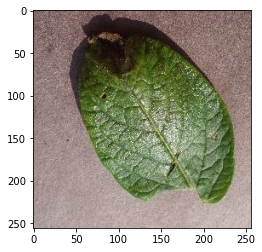

In [42]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("first images's actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [43]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0) #Create a batch
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

AttributeError: 'int' object has no attribute 'predict'

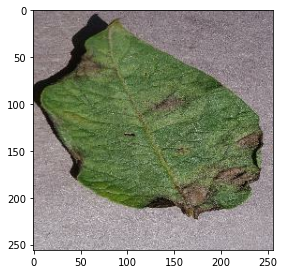

In [64]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f"Actual: {actual_class}, \n Predicted: {predicted_class}. \n Confidence: {confidence}%")
        
    
        plt.axis("off")
    

In [45]:
model_version = 0
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/9\assets


INFO:tensorflow:Assets written to: ../models/9\assets


In [46]:
to save the model of new version automatically
import os
model_version = max([int(i) for i in os.listdir("../models") + [0]])+1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/10\assets


INFO:tensorflow:Assets written to: ../models/10\assets


In [1]:
import pickle
pickle.dump(model, open('model.pkl', 'wb'))

NameError: name 'model' is not defined

In [50]:
 pickled_model = pickle.load(open('model.pkl', 'rb'))

FileNotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for ram://cd432717-eb9a-46d4-ae67-67020f052921/variables/variables
 You may be trying to load on a different device from the computational device. Consider setting the `experimental_io_device` option in `tf.saved_model.LoadOptions` to the io_device such as '/job:localhost'.

In [60]:
import h5py
from tensorflow.keras.models import load_model

model.save('my_model.h5')  
#del model  # deletes the existing model

# returns a compiled model
# identical to the previous one
model = load_model('my_model.h5')

AttributeError: 'int' object has no attribute 'save'